### Importación de datos



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Add 'Tienda' column to each dataframe
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


# Unir todos los DataFrames en uno solo
df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Ver las primeras filas
display(df_total.head())

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1


#1. Análisis de facturación



In [5]:
# Calcular ingresos totales por tienda
ingresos = {
    "Tienda 1": tienda1["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

# Mostrar resultados
for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:,.2f}")

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [6]:
# Combinar todos los datos en un solo DataFrame
datos_combinados = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
print("Informacion cargada con exito!")

Informacion cargada con exito!


Categorias mas y menos vendidas

In [7]:
# Agrupar por categoría y sumar la cantidad vendida
categorias_mas_vendidas = datos_combinados.groupby("Categoría del Producto")["Precio"].sum().reset_index()

# Renombrar la columna 'Precio' por 'cantidad'
categorias_mas_vendidas = categorias_mas_vendidas.rename(columns={"Precio": "Cantidad"})

# Ordenar las categorías por cantidad vendida (de mayor a menor)
categorias_mas_vendidas = categorias_mas_vendidas.sort_values(by="Cantidad", ascending=False)

# Mostrar las categorías más vendidas
print(categorias_mas_vendidas)

    Categoría del Producto         Cantidad
3             Electrónicos 1,660,576,500.00
2        Electrodomésticos 1,324,751,100.00
7                  Muebles   757,661,000.00
4   Instrumentos musicales   348,772,600.00
1     Deportes y diversión   142,977,700.00
5                 Juguetes    73,604,400.00
0  Artículos para el hogar    57,579,800.00
6                   Libros    37,696,100.00


# 3. Calificación promedio de la tienda


In [8]:
# Calcular promedio por tienda usando el DataFrame combinado
promedio_calificaciones = (
    df_total
    .groupby("Tienda", as_index=False)["Calificación"]
    .mean()
    .rename(columns={"Calificación": "Calificación_promedio"})
    .sort_values(by="Calificación_promedio", ascending=False)
)

print("Promedio de calificaciones por tienda:")
print(promedio_calificaciones)

Promedio de calificaciones por tienda:
     Tienda  Calificación_promedio
2  Tienda 3                   4.05
1  Tienda 2                   4.04
3  Tienda 4                   4.00
0  Tienda 1                   3.98


# 4. Productos más y menos vendidos

In [9]:
productos_mas_vendidos = (
    df_total
      .groupby('Producto')
      .agg(Cantidad=('Precio', 'sum'))       # agregamos y nombramos la salida
      .sort_values('Cantidad', ascending=False)
      .reset_index()
)

print(productos_mas_vendidos)

                       Producto       Cantidad
0                 TV LED UHD 4K 432,489,600.00
1                     Iphone 15 401,051,200.00
2                  Refrigerador 384,937,400.00
3                      Smart TV 290,221,800.00
4              Lavadora de ropa 242,468,600.00
5                  Lavavajillas 240,536,500.00
6                   Tablet ABXY 219,012,800.00
7              Secadora de ropa 210,238,000.00
8                  Celular ABXY 157,911,100.00
9                       Batería 147,806,300.00
10                    Cama king 135,780,400.00
11                       Estufa 130,871,100.00
12           Guitarra eléctrica 129,404,800.00
13              Sofá reclinable 123,279,100.00
14                   Microondas 115,699,500.00
15                     Cama box 104,097,800.00
16                    Bicicleta  96,487,500.00
17                      Armario  96,245,800.00
18             Silla de oficina  69,099,000.00
19            Guitarra acústica  58,898,100.00
20           

Top 10 Productos mas vendidos

/tmp/ipython-input-3166090561.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad', y='Producto', data=top_10_productos, palette='viridis')


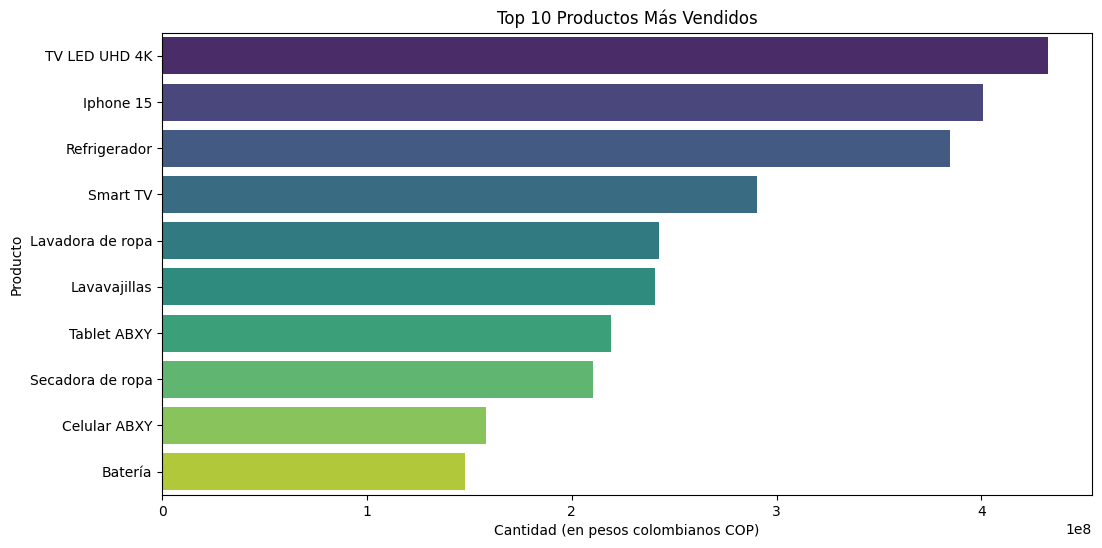

In [10]:
# Mostrar las 10 primeras categorías más vendidas
top_10_productos = productos_mas_vendidos.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad', y='Producto', data=top_10_productos, palette='viridis')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad (en pesos colombianos COP)')
plt.ylabel('Producto')
plt.show()

Top 10 Productos menos vendidos

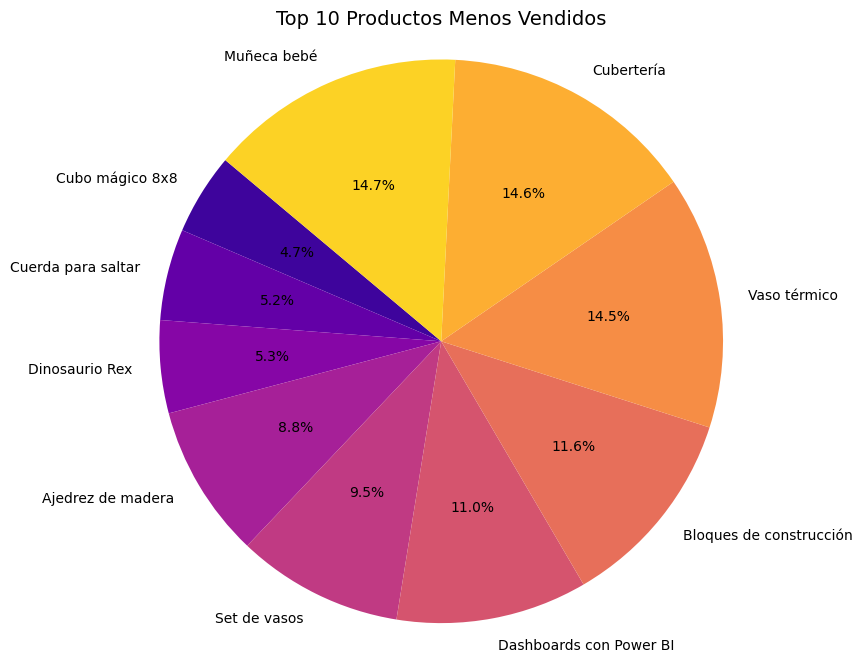

In [11]:
# Seleccionar los 10 productos menos vendidos
bottom_10_productos = productos_mas_vendidos.sort_values(
    by='Cantidad', ascending=True
).head(10)

# Generar una paleta de colores con Seaborn
colors = sns.color_palette("plasma", len(bottom_10_productos))

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(
    bottom_10_productos['Cantidad'],
    labels=bottom_10_productos['Producto'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Top 10 Productos Menos Vendidos', fontsize=14)
plt.axis('equal')  # Mantener forma circular
plt.show()


# 5. Envío promedio por tienda

In [ ]:
# Calcular el promedio del costo de envío (skipna=True implícito)
promedio_costo_envio = datos_combinados["Costo de envío"].mean()

print(f"El costo promedio del envío es: {promedio_costo_envio:.2f} pesos colombianos COP")

El costo promedio del envío es: 24875.15 pesos colombianos COP


+----------+---------------------+
| Tienda   |   Promedio de Envio |
|----------+---------------------|
| Tienda 1 |             26018.6 |
| Tienda 2 |             25216.2 |
| Tienda 3 |             24805.7 |
| Tienda 4 |             23459.5 |
+----------+---------------------+


/tmp/ipython-input-1156205087.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Promedio de Envio', data=promedio_envio_df, palette='viridis')


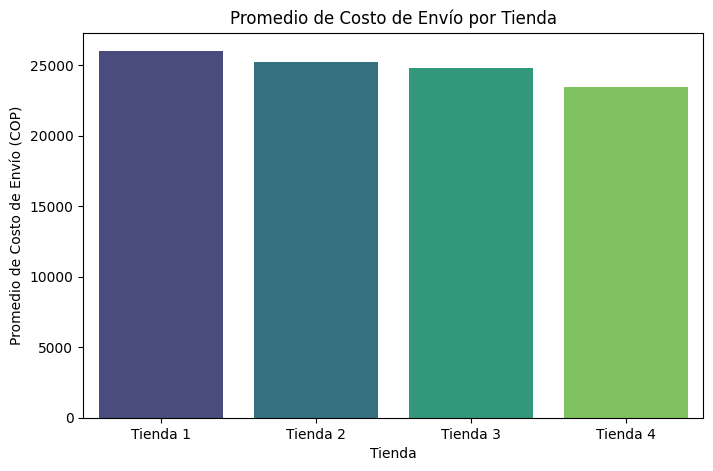

In [12]:
from tabulate import tabulate

# Use the already combined dataframe df_total
promedio_envio_por_tienda = (
    df_total
      .groupby("Tienda")["Costo de envío"]
      .mean()
)

promedio_envio_df = promedio_envio_por_tienda.reset_index(name="Promedio de Envio")

# tablefmt puede ser "psql", "grid", "fancy_grid", etc.
print(tabulate(promedio_envio_df,
               headers="keys",
               tablefmt="psql",
               showindex=False))


Tabla final

In [21]:
df_total

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,"227,700.00","12,600.00",12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25,-75.56,Tienda 4
9431,Silla de oficina,Muebles,"342,000.00","18,600.00",17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.13,-73.12,Tienda 4
9432,Vaso térmico,Deportes y diversión,"36,700.00","2,400.00",03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08,Tienda 4
9433,Set de ollas,Artículos para el hogar,"151,800.00","8,300.00",15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.44,-76.52,Tienda 4


In [24]:
# Reemplaza df por tu dataframe principal
tabla_resumen = df_total.groupby("Tienda").agg({
    "Precio": "sum",
    "Categoría del Producto": [('Categoria_mas_vendida', lambda x: x.value_counts().index[0]),
                               ('Categoria_menos_vendida', lambda x: x.value_counts().index[-1])],
    "Calificación": "mean",
    "Producto": [('Producto_mas_vendido', lambda x: x.value_counts().index[0]),
                 ('Producto_menos_vendido', lambda x: x.value_counts().index[-1])],
    "Costo de envío": "mean"
}).reset_index()

# Flatten the multi-level columns
tabla_resumen.columns = ['_'.join(col).strip('_') for col in tabla_resumen.columns.values]

# Redondear cifras si es necesario
tabla_resumen["Calificación_mean"] = tabla_resumen["Calificación_mean"].round(2)
tabla_resumen["Costo de envío_mean"] = tabla_resumen["Costo de envío_mean"].round(2)

tabla_resumen

,Tienda,Precio_sum,Categoría del Producto_Categoria_mas_vendida,Categoría del Producto_Categoria_menos_vendida,Calificación_mean,Producto_Producto_mas_vendido,Producto_Producto_menos_vendido,Costo de envío_mean
0,Tienda 1,"1,150,880,400.00",Muebles,Artículos para el hogar,3.98,Microondas,Celular ABXY,"26,018.61"
1,Tienda 2,"1,116,343,500.00",Muebles,Artículos para el hogar,4.04,Iniciando en programación,Juego de mesa,"25,216.24"
2,Tienda 3,"1,098,019,600.00",Muebles,Artículos para el hogar,4.05,Kit de bancas,Bloques de construcción,"24,805.68"
3,Tienda 4,"1,038,375,700.00",Muebles,Instrumentos musicales,4.00,Cama box,Guitarra eléctrica,"23,459.46"


# **Analisis completo de la informacion**


**Facturacion total de las tiendas**

Con base en los datos analizados, la Tienda 1 se posiciona como la mejor en términos de ingresos, alcanzando un total de 1150880400 cifra que la sitúa por encima de las demás. En contraste, la Tienda 4 registra el menor nivel de ventas, con ingresos de 1 038 375 700, lo que refleja su menor participación en el total generado durante el periodo evaluado.

In [25]:
# Mostrar resultados
for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:,.2f}")

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


Esta grafica presenta las categorias mas y menos vendidas de las tiendas

/tmp/ipython-input-2000698305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


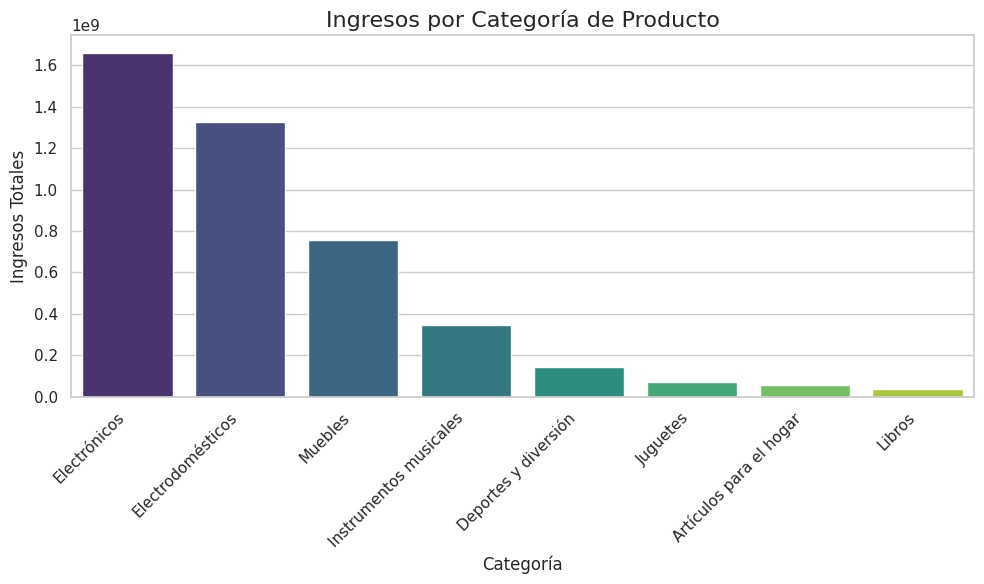

In [26]:


# Configuración del estilo
sns.set(style="whitegrid")

# Crear la gráfica de barras
plt.figure(figsize=(10,6))
sns.barplot(
    data=categorias_mas_vendidas,
    x="Categoría del Producto",
    y="Cantidad",
    palette="viridis"
)

# Personalizar etiquetas y título
plt.title("Ingresos por Categoría de Producto", fontsize=16)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Ingresos Totales", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Mostrar la gráfica
plt.tight_layout()
plt.show()


**Evaluacion Promedio por tienda**

Las evaluaciones promedio presentan lo mas importante de este analisis, con un ranking de 1-5, se presenta la calificacion promedio de cada tienda

In [28]:
print("Promedio de calificaciones por tienda:")
print(promedio_calificaciones)

Promedio de calificaciones por tienda:
     Tienda  Calificación_promedio
2  Tienda 3                   4.05
1  Tienda 2                   4.04
3  Tienda 4                   4.00
0  Tienda 1                   3.98


Las siguientes 2 graficas presentan cuales son los productos co nmas y menos ventas entre las 4 tiendas, presentando los 10 productos mas vendidos y los 10 menos vendidos.

/tmp/ipython-input-3166090561.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad', y='Producto', data=top_10_productos, palette='viridis')


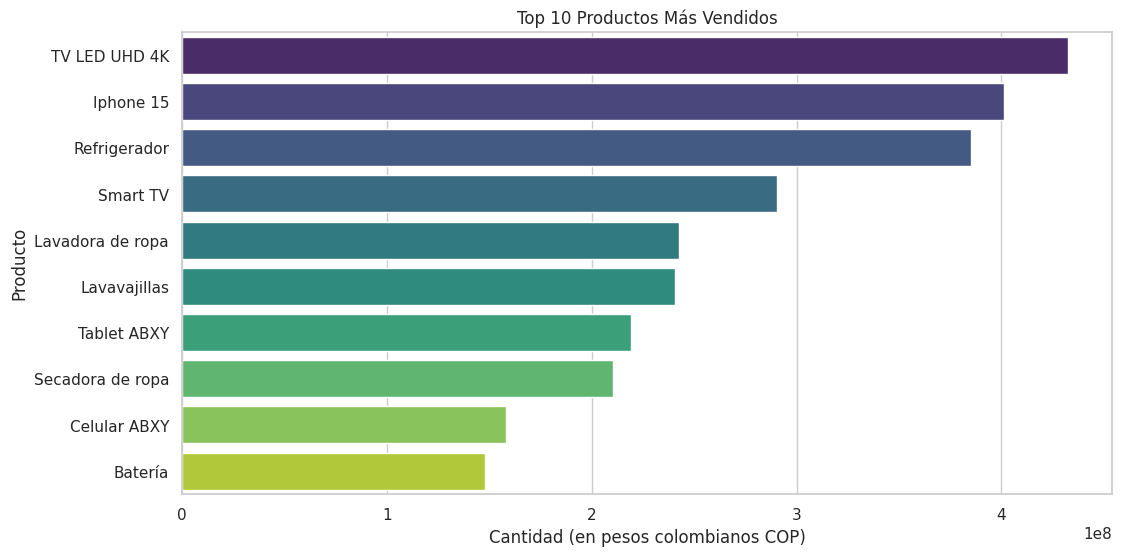

In [29]:
# Mostrar las 10 primeras categorías más vendidas
top_10_productos = productos_mas_vendidos.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad', y='Producto', data=top_10_productos, palette='viridis')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad (en pesos colombianos COP)')
plt.ylabel('Producto')
plt.show()

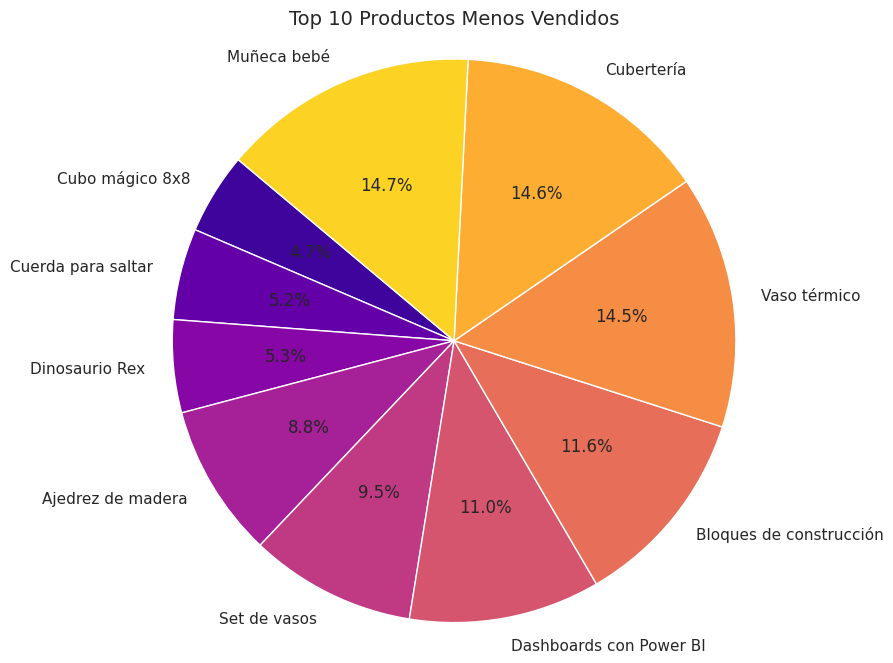

In [30]:
# Seleccionar los 10 productos menos vendidos
bottom_10_productos = productos_mas_vendidos.sort_values(
    by='Cantidad', ascending=True
).head(10)

# Generar una paleta de colores con Seaborn
colors = sns.color_palette("plasma", len(bottom_10_productos))

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(
    bottom_10_productos['Cantidad'],
    labels=bottom_10_productos['Producto'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Top 10 Productos Menos Vendidos', fontsize=14)
plt.axis('equal')  # Mantener forma circular
plt.show()

A continuacion, se presenta el promedio de costo de envio de cada una de las tiendas, demostrando que la tienda con un promedio menor es la Tienda 4 y con mayor promedio es la Tienda 1

/tmp/ipython-input-2420076805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Promedio de Envio', data=promedio_envio_df, palette='viridis')


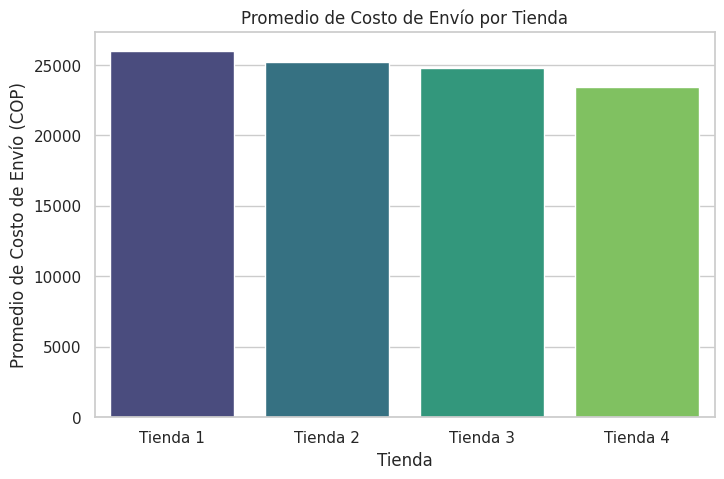

In [31]:
# Generate a bar plot for average shipping cost per store
plt.figure(figsize=(8, 5))
sns.barplot(x='Tienda', y='Promedio de Envio', data=promedio_envio_df, palette='viridis')
plt.title('Promedio de Costo de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Costo de Envío (COP)')
plt.show()

# **Conclusion**

Tras analizar los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos con mayor y menor rotación, y el coste de envío promedio por tienda, se concluye que la Tienda 1 es la más sólida y rentable del conjunto, destacando por sus altos ingresos y desempeño general.

Por otro lado, la Tienda 4 presenta el menor nivel de ingresos, lo que la posiciona como la opción más viable para ser vendida. Aunque su coste de envío promedio es el más bajo, este dato puede estar influenciado por la baja actividad comercial o por la cercanía geográfica de sus clientes, lo que limita su alcance.

Considerando todos los factores, se recomienda mantener la Tienda 1 como activo principal y vender la Tienda 4 para liberar recursos e invertir en nuevas oportunidades de negocio con mayor potencial de crecimiento.